# SI221 - TP K-nearest neighbors

### Données

Nous allons travailler sur des images de chiffres manuscrits (de 0 à 9), provenant du dataset MNIST. Ces images, de 28$\times$28 pixels, sont présentées comme des vecteurs lignes d'entiers compris entre $0$ et $255$. On y associe des étiquettes, indiquant quel est le chiffre représenté sur l'image (ici, l'étiquette correspondant au chiffre '0' est '10'. 

In [32]:
import numpy as np
import scipy.io
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#from sklearn.metrics import confusion_matrix
import datetime
from time import time
import itertools

In [33]:
# Careful, we need to convert the data to float - if we keep the encoding as 8-bit integer,
# we will certainly have issues when applying numpy functions to the data 
train_data = scipy.io.loadmat('data_app.mat')['x'].astype(np.float)
test_data = scipy.io.loadmat('data_test.mat')['x'].astype(np.float)


C:\Users\Stephen\AppData\Local\Temp\ipykernel_25916\154632999.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_data = scipy.io.loadmat('data_app.mat')['x'].astype(np.float)
C:\Users\Stephen\AppData\Local\Temp\ipykernel_25916\154632999.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_data = scipy.io.loadmat('data_test.mat'

In [34]:
train_labels = scipy.io.loadmat('data_app.mat')['S'].reshape(-1)
test_labels = scipy.io.loadmat('data_test.mat')['S'].reshape(-1)

for i in train_labels:
    a=np.zeros((1,10))
    a[0][int(i)-1]+=1
#a[0]= a[0]/len(train_labels)

print([a[0]])


[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])]


Quelle est la taille de l’ensemble d’entraînement et de l’ensemble de test ? Les exemples
sont-ils équirépartis suivant les classes ? Affichez les premières images de l'ensemble d'entraînement ainsi que les étiquettes correspondantes. 

# Réponses

- L'ensemble d'entrainement a une taille de 1000 éléments pour 300 échantillons de tests. 
- Les échantillons sont relativement bien répartis

Train set size : 1000
Test set size : 300


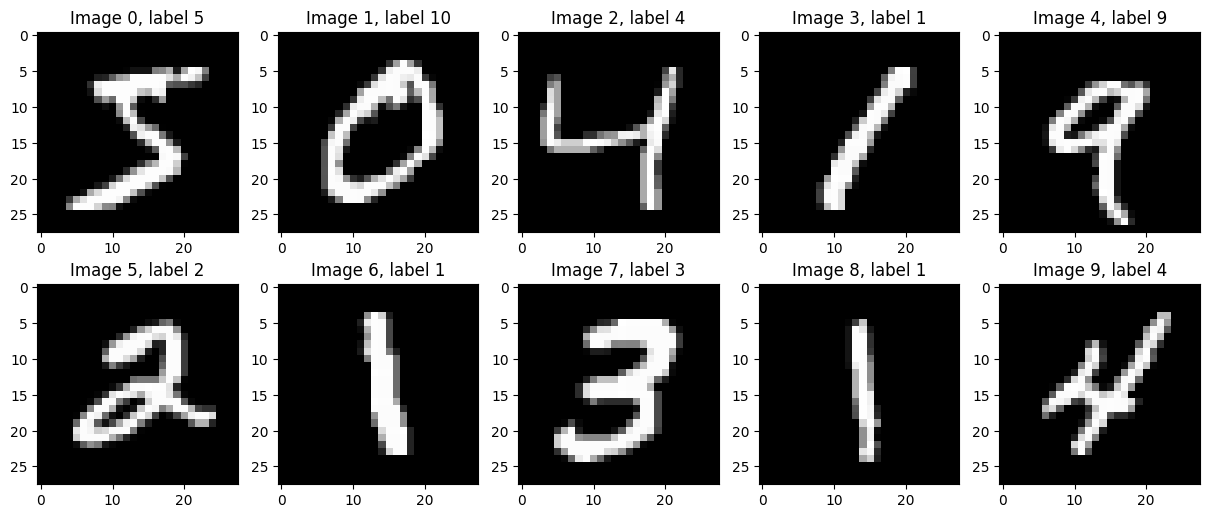

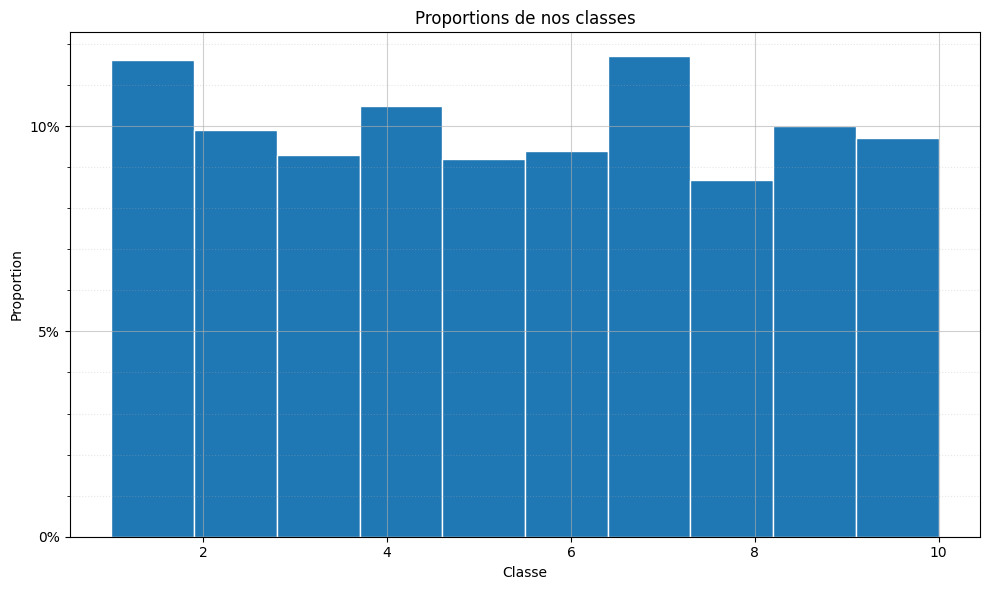

In [35]:
print(f'Train set size : {train_labels.size}')
print(f'Test set size : {test_labels.size}')

train_images = train_data.reshape((train_labels.size, 28, 28))

fig,axes=plt.subplots(ncols=5, nrows=2, figsize=(15,6))
ax = axes.ravel()

# on affiche 10 images notre dataset
for i in range(10):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].set_title(f'Image {i}, label {train_labels[i]}')
plt.show()


# Regardons les proportions de nos classes
fig,ax=plt.subplots(figsize=(10,6))

major_ticks_y=np.linspace(0,1,21)
minor_ticks_y=np.linspace(0,1,101)

ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y,minor=True)
ax.set_title("Proportions de nos classes")
ax.grid(which="major",alpha=0.6)
ax.grid(which="minor",alpha=0.3,linestyle=':')
ax.hist(train_labels, weights=np.ones_like(train_labels)/len(train_labels), edgecolor="white")
ax.set_xlabel('Classe')
ax.set_ylabel('Proportion')
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=0))
plt.tight_layout()
plt.show()

Implémentez la méthode des $k$-plus proche voisins en prenant comme caractéristiques les valeurs des
pixels. On donnera, pour différentes valeurs du paramètre k (k=1, 3, 4, 5):
- Le taux d’erreur.
- La matrice de confusion - La matrice de confusion est une matrice de taille $10\times10$ dont l’élément d’indice (i,j) est le nombre de vecteurs de la classe i qui ont été affectés à la classe j par la méthode.
- Visualisez quelques confusions entre caractères.

In [36]:
def knn(k,test,train,labels):
    pred = np.zeros(test.shape[0])
    for i in range(test.shape[0]):
        image = test[i]
        # distances à chaque image dans l’ensemble d’entraînement (Norm 2)
        distances=np.zeros(train.shape[0])
        for j in range(distances.size):
            distances[j]= np.linalg.norm(train[j,:] - image)

        # obtenir les distances les plus proches
        distances_ord, lab = zip(*sorted(zip(distances, labels)))
        knn=lab[0:k]
        # obtenir la classe la plus fréquente entre les voisins les plus proches
        counts = np.bincount(knn)
        pred[i]= np.argmax(counts)
    return pred

In [37]:
#Définir une fonction permettant d'afficher les matrices de confusions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    print(f'Taux d\'erreur : {1-np.trace(cm)/np.sum(cm):.2%}%')
    return 1-np.trace(cm)/np.sum(cm)

In [38]:
def format_duration(duration):
    td = datetime.timedelta(seconds=duration)
    hours, remainder = divmod(td.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    microseconds = td.microseconds
    seconds += microseconds / 1000000

    parts = []
    if td.days > 0:
        parts.append(f'{td.days}d')
    if hours > 0:
        parts.append(f'{hours}h')
    if minutes > 0:
        parts.append(f'{minutes}min')
    if seconds > 1:
        parts.append(f'{seconds:.2f}s')
    elif not parts:
        parts.append(f'{microseconds/1000:.2f}ms')

    return ' '.join(parts)

KNN avec k=1
Done in 3.80s


TypeError: Invalid shape (784,) for image data

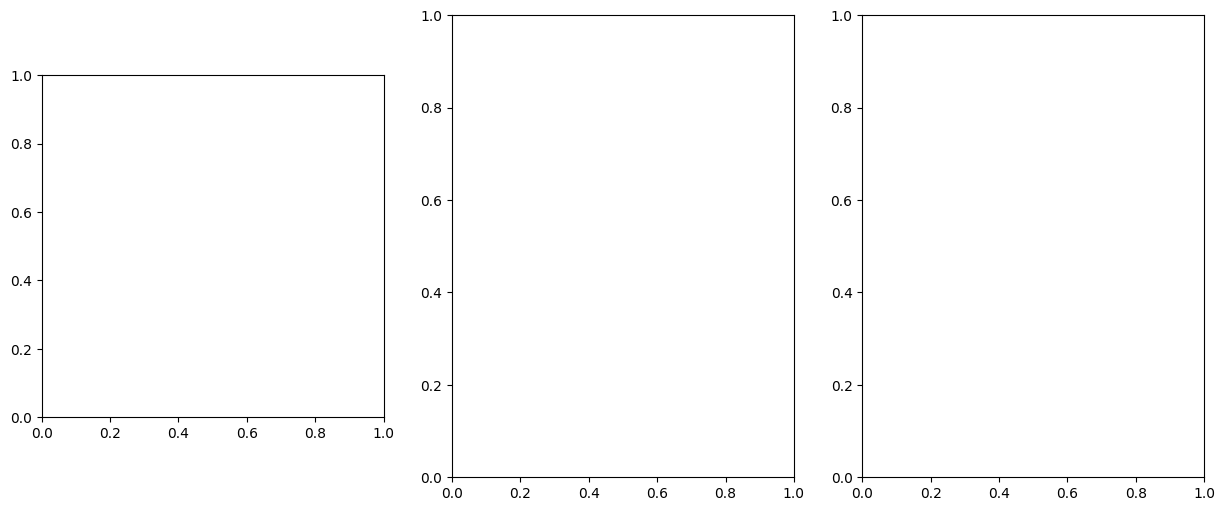

In [39]:
erreur = []
for k in range(1, 11):
    print(f"KNN avec k={k}")
    t0 = time()
    y_pred = knn(k, test_data, train_data, train_labels)
    print(f"Done in {format_duration(time() - t0)}")
    
    fausses_pred = (y_pred != test_labels)
    #visualisation
    fig,axes=plt.subplots(ncols=3, figsize=(15,6))
    ax = axes.ravel()

    # on affiche les prototypes
    for i in range(min(len(fausses_pred), 3)):
        ax[i].imshow(test_data[fausses_pred][i], cmap='gray')
        ax[i].set_title(f'Erreur, prédit de classe {y_pred[fausses_pred][i]}')
    plt.show()

    # confusion matrix
    cnf_matrix = confusion_matrix(test_labels, y_pred)

    # normalized confusion matrix
    plt.figure()
    err = plot_confusion_matrix(cnf_matrix, classes=[i for i in range(1, 11)], normalize=True,
                          title='matrice de confusion normalisée pour LDA')
    erreur.append(err)
    plt.show()

plt.plot(np.arange(1, 11, 1), erreur)
plt.title("Erreur en fonction de k")
plt.show()

- Construisez des prototypes (au moins un par classe) à partir des images de l’ensemble d’apprentissage, et visualisez-les. Le prototype peut être par exemple la moyenne des exemples correspondants à chaque classe. 
- Classez les images de test en les comparant aux prototypes.
- Comparez avec les résultats obtenus précedemment.

In [ ]:
#creer des prototypes
sums = np.zeros((10,28,28))
occur = np.zeros(10)

for i in range(train_labels.size):
    occur[train_labels[i]-1] += 1
    sums[train_labels[i]-1, : , :] += train_data[i, : , :]       
prototypes = np.array([sums[i, :, :] / occur[i] for i in range(10)])

#visualisation
fig,axes=plt.subplots(ncols=5, nrows=2, figsize=(15,6))
ax = axes.ravel()

# on affiche les prototypes
for i in range(10):
    ax[i].imshow(prototypes[i], cmap='gray')
    ax[i].set_title(f'Prototype {i}')
plt.show()

In [ ]:
erreur = []
for k in range(1, 11):
    print(f"KNN avec k={k}")
    t0 = time()
    y_pred = knn(k, test_data, prototypes, [i for i in range(1, 11)])
    print(f"Done in {format_duration(time() - t0)}")
    
    # confusion matrix
    cnf_matrix = confusion_matrix(test_labels, y_pred)

    # normalized confusion matrix
    plt.figure()
    err = plot_confusion_matrix(cnf_matrix, classes=[i for i in range(1, 11)], normalize=True,
                          title='matrice de confusion normalisée pour LDA')
    erreur.append(err)
    plt.show()

plt.plot(np.arange(1, 11, 1), erreur)
plt.title("Erreur en fonction de k")
plt.show()

# Réponses

Les résultats sont clairement moins bons, mais beaucoup plus rapides !